In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

# use CMU Serif
import matplotlib as mpl
import matplotlib.font_manager as font_manager
mpl.rcParams['font.family']='serif'
# cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
cmfont = font_manager.FontProperties('/Users/theoares/Library/Fonts/cmunrm.otf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False

from utils import *
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['/Users/theoares/Library/Fonts/cmunrm.otf'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


In [2]:
m = 0.8
# m2 = 1.8
signal = lambda t : np.exp(- m * t)# + np.exp(-m2 * t)

<IPython.core.display.Javascript object>


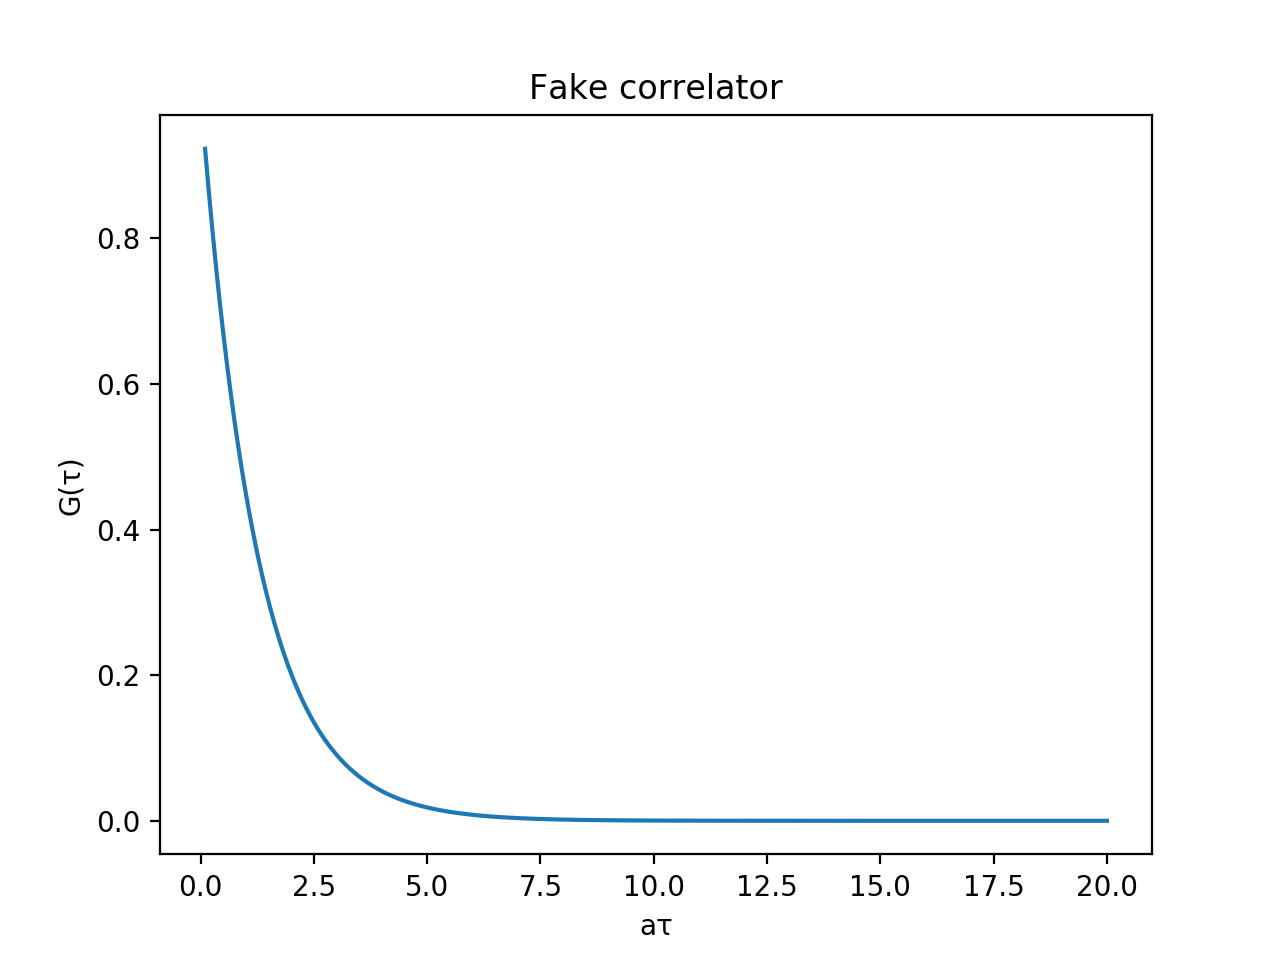

In [3]:
x = np.linspace(0.1, 20, 1000)
plt.figure()
plt.plot(x, signal(x))
plt.title('Fake correlator')
plt.ylabel('G(τ)')
plt.xlabel('aτ')
plt.show()

In [4]:
Nreal = 20000
omega_bounds = [-10, 10]
eta = 1e-3
theta_mp1 = lambda z : 0
np.random.seed(10)
# taus = np.float64(np.random.choice(np.arange(1, 60), 30))
# taus = range(40, 60)
taus = np.arange(1, 50, 0.5)
print('Evaluating Greens function at tau = it = ' + str(taus))

Evaluating Greens function at tau = it = [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5
 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.  35.5
 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5 42.  42.5
 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5 49.  49.5]


In [5]:
# eps = 1e-16
eps = 0
Y = np.array([gmp.mpc(0, t) for t in taus])
C = np.array([gmp.mpc(-signal(t), eps) for t in taus])
zmesh = np.linspace(omega_bounds[0], omega_bounds[1], num = Nreal)
zspace = np.array([gmp.mpc(z, eta) for z in zmesh])

## Laplace transform then continue

## FFT then continue

In [6]:
Ctilde_float = np.fft.fft(np.fft.fftshift(np.array([signal(t) for t in taus])))
Ctilde = np.array([gmp.mpc(z) for z in Ctilde_float])

In [7]:
lam1 = np.array([h(z) for z in Ctilde])
phi1 = construct_phis(Y, lam1)
NGreal1 = analytic_continuation(Y, phi1, zspace, theta_mp1)
NGreal_float1 = np.array([np.complex(x) for x in NGreal1])

<IPython.core.display.Javascript object>


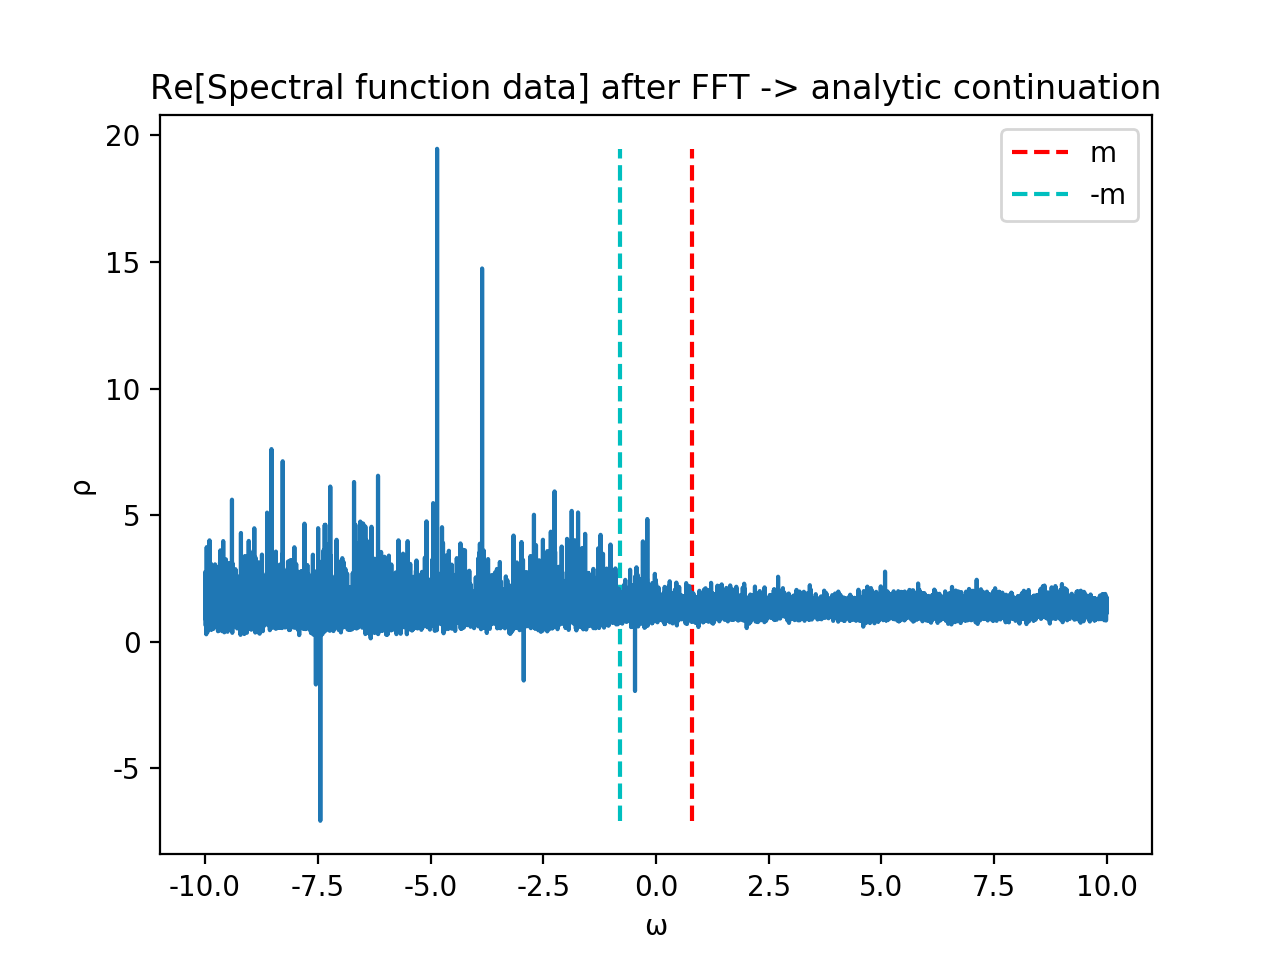

In [20]:
plt.figure()
plt.plot(zmesh, np.real(NGreal_float1))
plt.vlines(m, np.min(np.real(NGreal_float1)), np.max(np.real(NGreal_float1)), linestyles = 'dashed', colors = 'r', label = 'm')
plt.vlines(-m, np.min(np.real(NGreal_float1)), np.max(np.real(NGreal_float1)), linestyles = 'dashed', colors = 'c', label = '-m')
plt.title('Re[Spectral function data] after FFT -> analytic continuation')
plt.xlabel('ω')
plt.ylabel('ρ')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


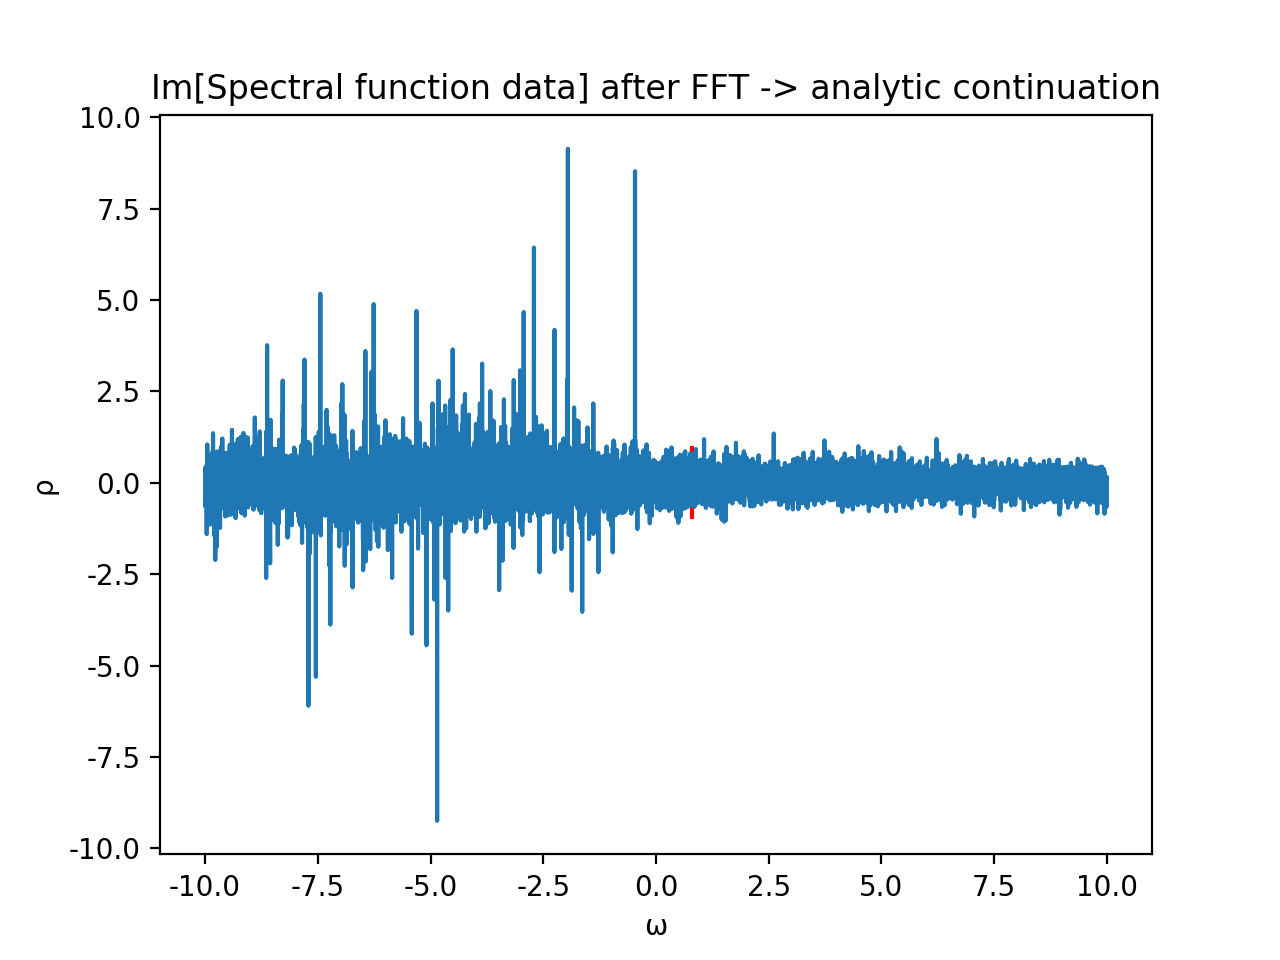

In [9]:
plt.figure()
plt.plot(zmesh, np.imag(NGreal_float1))
plt.title('Im[Spectral function data] after FFT -> analytic continuation')
plt.vlines(m, -1, 1, linestyles = 'dashed', colors = 'r', label = 'm')
plt.xlabel('ω')
plt.ylabel('ρ')
plt.show()

## Continue then FFT

In [10]:
lam2 = np.array([h(z) for z in C])
phi2 = construct_phis(Y, lam2)
NGreal2 = analytic_continuation(Y, phi2, zspace, theta_mp1)
NGreal_float2 = np.array([np.complex(x) for x in NGreal2])

<IPython.core.display.Javascript object>


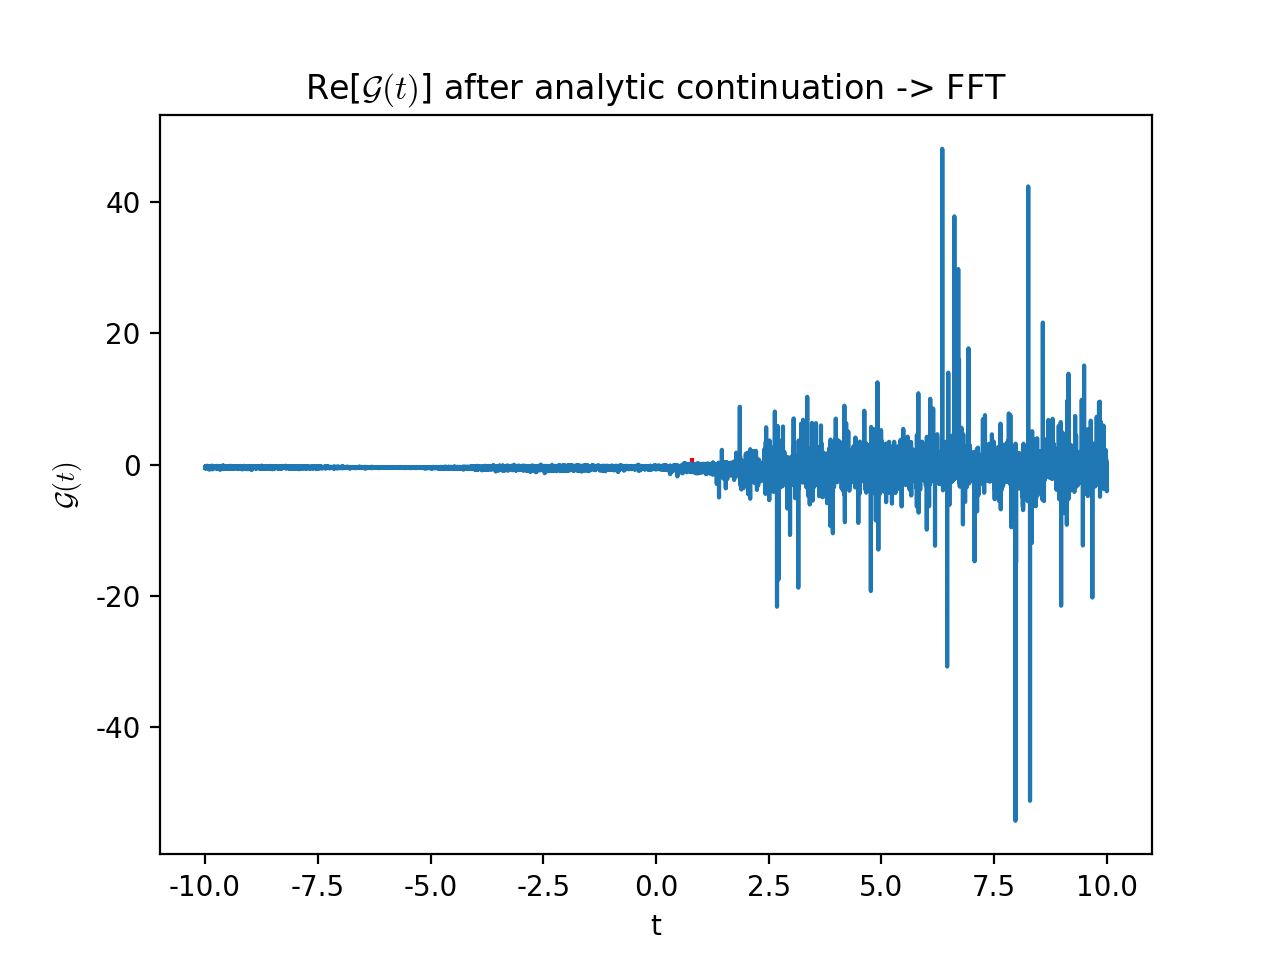

In [11]:
plt.figure()
plt.plot(zmesh, np.real(NGreal_float2))
plt.title('Re[$\mathcal{G}(t)$] after analytic continuation -> FFT')
plt.vlines(m, -1, 1, linestyles = 'dashed', colors = 'r', label = 'm')
plt.xlabel('t')
plt.ylabel('$\mathcal{G}(t)$')
plt.show()

In [12]:
# these should be equal for a valid analytic continuation
# print(C)
# print(analytic_continuation(Y, phi2, Y, theta_mp1))

In [13]:
rho = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(NGreal_float2)))
# rho = np.fft.ifft(NGreal_float2)

<IPython.core.display.Javascript object>


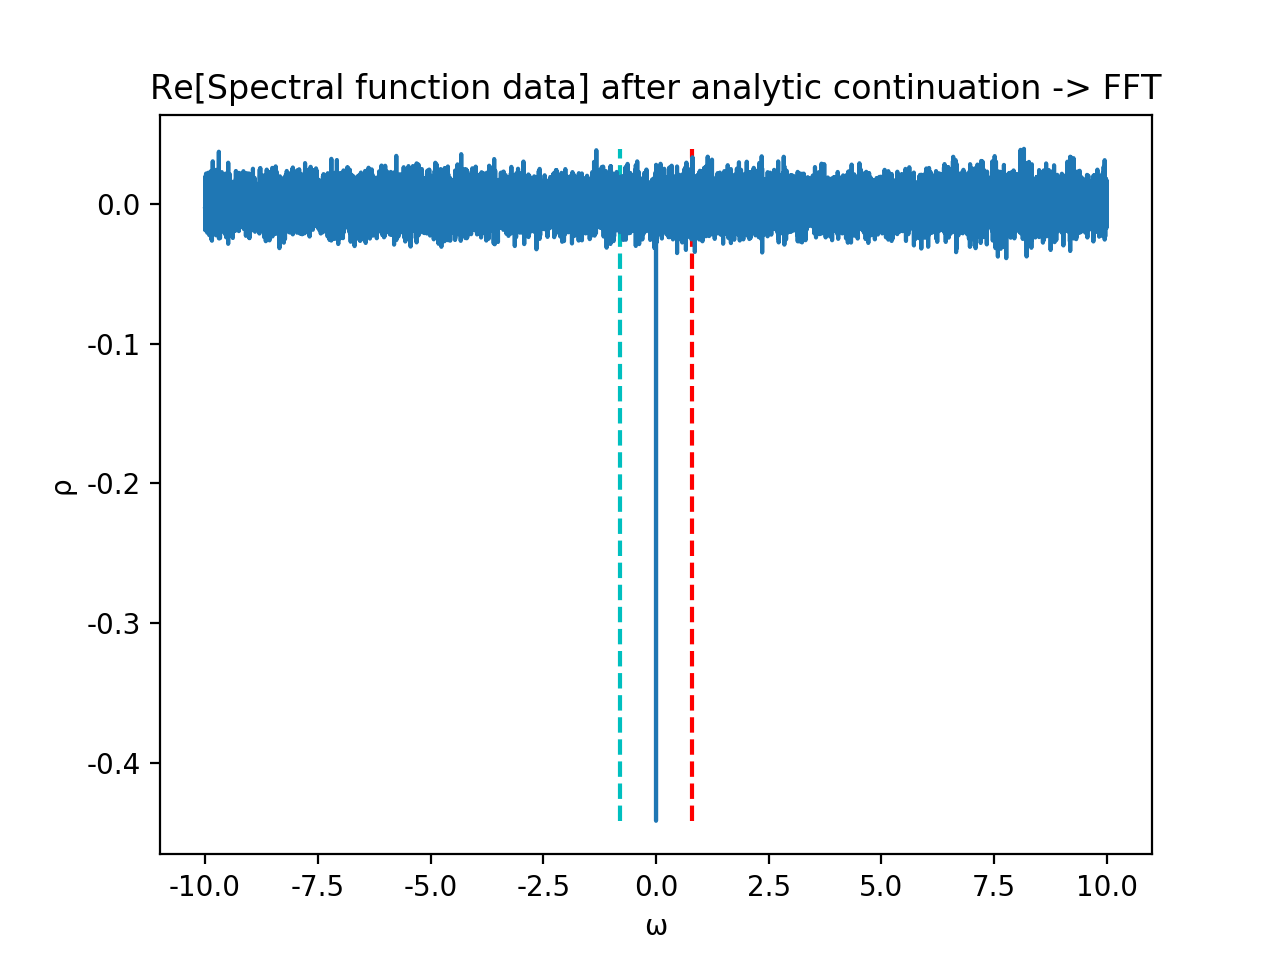

In [21]:
plt.figure()
plt.plot(zmesh, np.real(rho))
plt.title('Re[Spectral function data] after analytic continuation -> FFT')
plt.vlines(m, np.min(np.real(rho)), np.max(np.real(rho)), linestyles = 'dashed', colors = 'r', label = 'm')
plt.vlines(-m, np.min(np.real(rho)), np.max(np.real(rho)), linestyles = 'dashed', colors = 'c', label = '-m')
plt.xlabel('ω')
plt.ylabel('ρ')
plt.show()

<IPython.core.display.Javascript object>


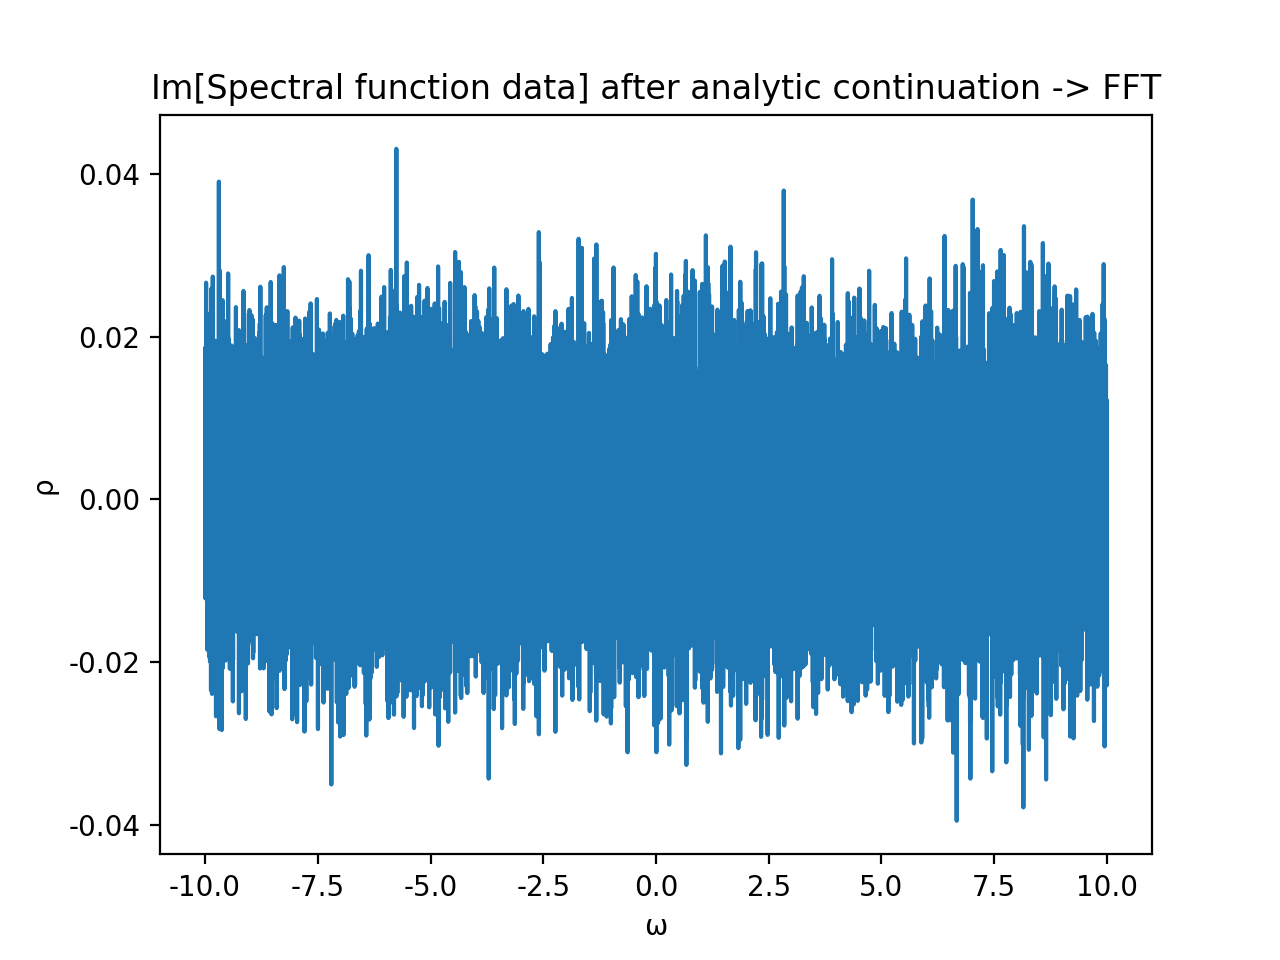

In [15]:
plt.figure()
plt.plot(zmesh, np.imag(rho))
plt.title('Im[Spectral function data] after analytic continuation -> FFT')
plt.xlabel('ω')
plt.ylabel('ρ')
plt.show()